In [2]:
import pandas as pd
import nltk
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dodom\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
df = pd.read_csv("spam.csv",encoding='latin-1')
df.head(5900)


dataset_size = len(df)
num_features = len(df.columns)

print("Dataset size:", dataset_size)
print("Number of features:", num_features)

df = df[['v2','v1']]
df.rename(columns={'v2':'messages','v1':'Label'},inplace=True)
df.head()

Dataset size: 5572
Number of features: 5


,messages,Label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [7]:
df.isnull().sum()

messages    0
Label       0
dtype: int64

In [44]:
print(df['Label'].value_counts())

Label
ham     4825
spam     747
Name: count, dtype: int64


In [48]:
Stopwords = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in Stopwords)
    return text.strip()

In [49]:
df['clean_text']= df['messages'].apply(clean_text)
df.head()

,messages,Label,clean_text
0,"Go until jurong point, crazy.. Available only ...",ham,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ham,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,ham,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",ham,nah think goes usf lives around though


In [50]:
X = df['clean_text']
y = df['Label']

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix
def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                               ('tfidf',TfidfTransformer()),
                               ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred, zero_division=1))
    conf = confusion_matrix(y_pred, y_test)
    sns.heatmap(conf)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix

def classify_kfold(model, X, y):
    # k-fold cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                               ('tfidf',TfidfTransformer()),
                               ('clf', model)])
    scores = cross_val_score(pipeline_model, X, y, cv=kfold)
    print('Accuracy:', scores.mean()*100)
    y_pred = cross_val_predict(pipeline_model, X, y, cv=kfold)
    print(classification_report(y, y_pred, zero_division=1))
    conf = confusion_matrix(y, y_pred)
    print(conf)

Accuracy: 92.17516152189519
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96      1206
        spam       1.00      0.42      0.59       187

    accuracy                           0.92      1393
   macro avg       0.96      0.71      0.77      1393
weighted avg       0.93      0.92      0.91      1393

Accuracy: 92.58783843620935
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96      4825
        spam       1.00      0.45      0.62       747

    accuracy                           0.93      5572
   macro avg       0.96      0.72      0.79      5572
weighted avg       0.93      0.93      0.91      5572

[[4825    0]
 [ 413  334]]


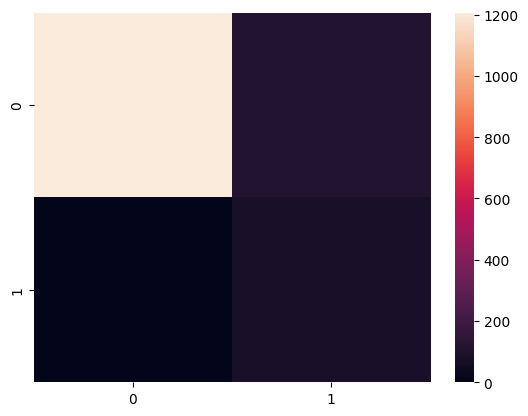

In [55]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classify(model, X, y)
classify_kfold(model, X, y)

Accuracy: 96.19526202440775
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1206
        spam       0.91      0.80      0.85       187

    accuracy                           0.96      1393
   macro avg       0.94      0.89      0.91      1393
weighted avg       0.96      0.96      0.96      1393

Accuracy: 96.21320172931543
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      4825
        spam       0.89      0.81      0.85       747

    accuracy                           0.96      5572
   macro avg       0.93      0.90      0.91      5572
weighted avg       0.96      0.96      0.96      5572

[[4753   72]
 [ 140  607]]


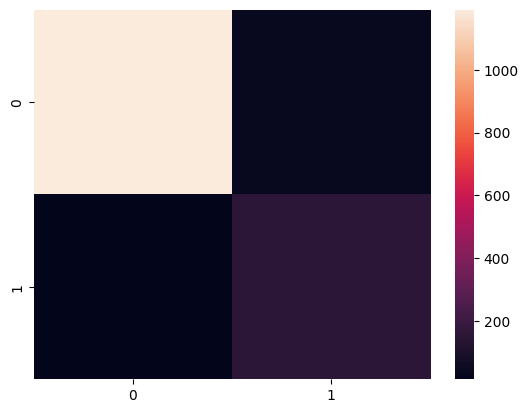

In [57]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)
classify_kfold(model, X, y)

Accuracy: 96.8413496051687
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1206
        spam       0.99      0.77      0.87       187

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393

Accuracy: 96.5363937171426
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      4825
        spam       0.98      0.76      0.85       747

    accuracy                           0.97      5572
   macro avg       0.97      0.88      0.92      5572
weighted avg       0.97      0.97      0.96      5572

[[4812   13]
 [ 180  567]]


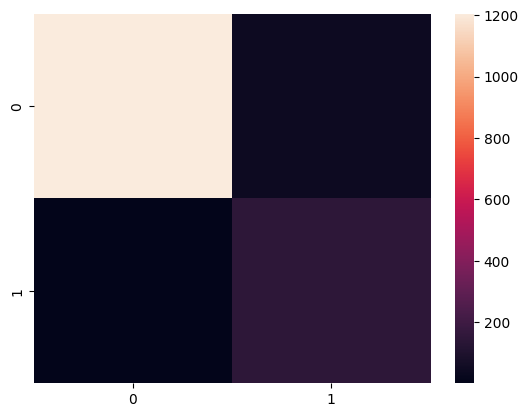

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)
classify_kfold(model, X, y)

Accuracy: 96.69777458722182
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       1.00      0.75      0.86       187

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.96      1393

Accuracy: 96.91301092495834
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      4825
        spam       1.00      0.77      0.87       747

    accuracy                           0.97      5572
   macro avg       0.98      0.89      0.93      5572
weighted avg       0.97      0.97      0.97      5572

[[4824    1]
 [ 171  576]]


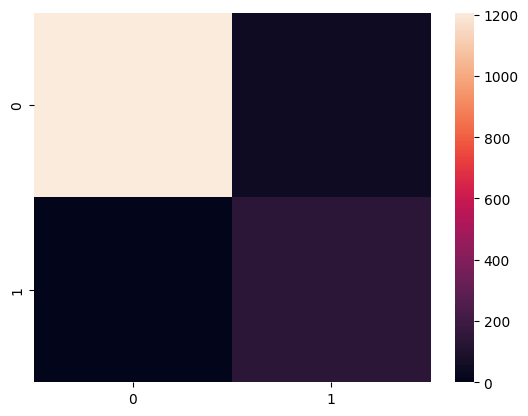

In [54]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)
classify_kfold(model, X, y)

Accuracy: 97.27207465900933
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1206
        spam       1.00      0.80      0.89       187

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393

Accuracy: 97.8284370949433
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.84      0.91       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572

[[4825    0]
 [ 122  625]]


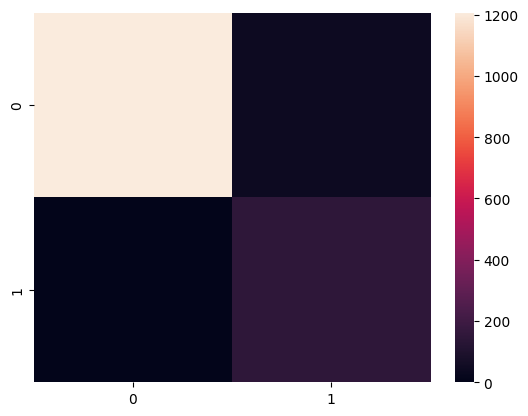

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)
classify_kfold(model, X, y)

Accuracy: 98.27709978463747
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       1.00      0.87      0.93       187

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393

Accuracy: 98.3130318570819
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.88      0.93       747

    accuracy                           0.98      5572
   macro avg       0.99      0.94      0.96      5572
weighted avg       0.98      0.98      0.98      5572

[[4822    3]
 [  91  656]]


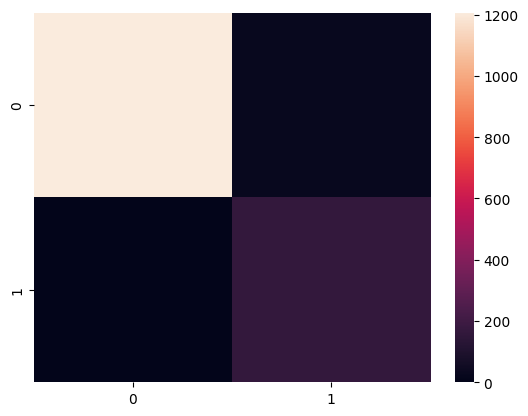

In [58]:
from sklearn.svm import SVC
model = SVC(C=3, class_weight='balanced')
classify(model, X, y)
classify_kfold(model, X, y)

In [61]:
from sklearn.pipeline import Pipeline
import joblib

# Create and fit the pipeline
pipeline_model = Pipeline([('vect', CountVectorizer()),
                           ('tfidf', TfidfTransformer()),
                           ('clf', model)]) # as the last used model was the best one with highest accuracy

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
pipeline_model.fit(x_train, y_train)
joblib.dump(pipeline_model, 'best_model.pkl')
print("Pipeline saved successfully.")


Pipeline saved successfully.


In [62]:
# Load the saved pipeline
loaded_model = joblib.load('best_model.pkl')

#New messages
new_messages = [
    "Congratulations! You've won a free ticket to the Bahamas. Call now to claim your prize!",
    "Hey, are we still on for the meeting tomorrow?",
    "Exclusive offer just for you! Get a 50'%' discount on your next purchase. Click the link to claim it now!",
    "Your package is out for delivery. Track it using the link provided in this message.",
    "You have been selected for a $1000 cash prize. Reply with 'WIN' to claim your reward!",
    "Reminder: Your appointment is scheduled for tomorrow at 3 PM. Please arrive 10 minutes early.",
    "Urgent! Your bank account has been compromised. Contact our helpline immediately to secure your funds.",
    "Great news! Your subscription has been successfully renewed. Enjoy uninterrupted service.",
    "FREE Netflix subscription for one year! Click here to activate your account now!",
    "Hey! Just checking in to see if you’re free for lunch this weekend. Let me know!"
]

cleaned_messages = [clean_text(msg) for msg in new_messages]
# Predict using the pipeline
predictions = loaded_model.predict(cleaned_messages)

# Print the predictions
for msg, pred in zip(cleaned_messages, predictions):
    print(f"Message: {msg}\nPrediction: {pred}\n")


Message: congratulations free ticket bahamas call claim prize
Prediction: spam

Message: hey still meeting tomorrow
Prediction: ham

Message: exclusive offer get 50 discount next purchase click link claim
Prediction: spam

Message: package delivery track using link provided message
Prediction: ham

Message: selected 1000 cash prize reply win claim reward
Prediction: spam

Message: reminder appointment scheduled tomorrow 3 pm please arrive 10 minutes early
Prediction: ham

Message: urgent bank account compromised contact helpline immediately secure funds
Prediction: ham

Message: great news subscription successfully renewed enjoy uninterrupted service
Prediction: ham

Message: free netflix subscription one year click activate account
Prediction: ham

Message: hey checking see free lunch weekend let know
Prediction: ham

